# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
# Your code:
import pandas as pd

data = pd.read_csv("./population_density.csv")
new_data = data.sample(frac=0.9,replace=None,random_state=400655)
new_data['population_density_categorical'] = None
col_name = new_data.columns.tolist()
# col_name.insert(1,'population_density_categorical')
print(col_name)
new_data.loc[new_data['population_density'] >= 5824, 'population_density_categorical'] = 'very high'
new_data.loc[(new_data['population_density'] >=4368) & (new_data['population_density'] <5824), 'population_density_categorical'] = 'high'
new_data.loc[(new_data['population_density'] >=2912) & (new_data['population_density'] <4368), 'population_density_categorical'] = 'medium'
new_data.loc[(new_data['population_density'] >=1456) & (new_data['population_density'] <2912), 'population_density_categorical'] = 'low'
new_data.loc[new_data['population_density'] <1456, 'population_density_categorical'] = 'very low'
print(new_data)
new_data.to_csv("./population_density_categorical.csv", index=False)


['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'weather_type', 'weather_type_details', 'date_time', 'population_density', 'population_density_categorical']
      holiday  temperature  rain_1h  snow_1h  clouds_percentage weather_type  \
3017     None      258.520     0.00      0.0                 20       Clouds   
46663    None      302.580     0.00      0.0                  5        Clear   
28459    None      275.790     0.00      0.0                 90       Clouds   
21304    None      269.010     0.00      0.0                 75         Haze   
30859    None      260.090     0.00      0.0                  1        Clear   
36121    None      288.990     0.00      0.0                 75         Mist   
2087     None      275.220     0.00      0.0                 90         Rain   
25242    None      294.890     0.00      0.0                  1        Clear   
22443    None      283.860     0.00      0.0                  1        Clear   
39057    None      27

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

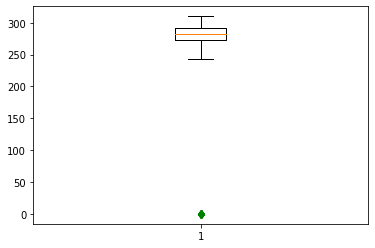

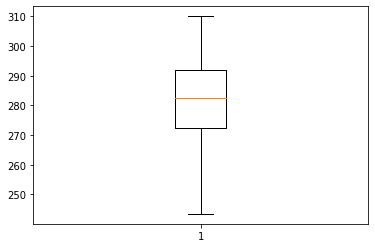

outliers:
 4841     0.0
7458     0.0
8678     0.0
15625    0.0
22930    0.0
23957    0.0
25960    0.0
36516    0.0
Name: temperature, dtype: float64


In [3]:
# Your code:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./population_density_categorical.csv")
plt.figure()
# boxplot with outliers
plt.boxplot(data['temperature'],0,'gd')
plt.show()
plt.figure()
#boxplot without outliers
plt.boxplot(data['temperature'], showfliers=False)
plt.show()
# find the concerte value of outliers
Q1 =  data['temperature'].quantile(0.25)
Q3 = data['temperature'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['temperature'] < Q1-1.5*IQR ) | (data['temperature'] > Q3+1.5*IQR)]['temperature']
print('outliers:\n',outliers)
# remove outlier from original dataset and generate new cleaned dataset
cleaned_data = pd.DataFrame(data) 
for index in outliers.index:
    cleaned_data.drop(index, axis=0, inplace=True)
    
# print(cleaned_data)


   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [4]:
# Your code:
ser_data = pd.Series(data['temperature'])
old_dict = {'median':ser_data.median(),'mean':ser_data.mean(),'mode':ser_data.mode()[0]}
print("orignal dataset: \n",old_dict)
ser_cleaned_data = pd.Series(cleaned_data['temperature'])
new_dict = {'median':ser_cleaned_data.median(),'mean':ser_cleaned_data.mean(),'mode':ser_cleaned_data.mode()[0]}
print('cleaned dataset: \n',new_dict)

# - Median: The median in the cleaned dataset(282.41) is slightly larger than the median in the original dataset(282.4)
#   since the data distribution is slightly shifted towards larger values after outliers with 0 values are removed.

# - Mean: The mean in the cleaned dataset(281.24) is slightly larger than the mean in the original dataset(281.18)
#   since we removed the influence of the outliers with 0 values, which would mame the mean of the whole dataset smaller.

# - Mode: The mode of cleaned data set remains the same as in the original dataset(274.15). 
#   This is because removing the outliers does not any influence on the most frequent value.

orignal dataset: 
 {'median': 282.48, 'mean': 281.2400300802139, 'mode': 274.15}
cleaned dataset: 
 {'median': 282.485, 'mean': 281.29190024437474, 'mode': 274.15}


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [9]:
# Your code:
print('rows of original dataset: ',len(data.index))
print('rows of cleaned dataset: ',len(cleaned_data.index))
print('rows of outliers: ',len(outliers.index))


rows of original dataset:  43384
rows of cleaned dataset:  43376
rows of outliers:  8


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

- Mean of population_density is maximal on New Years Day and minimal on Columbus Day


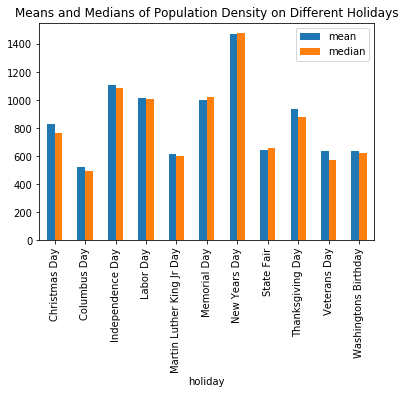

In [5]:
# Your code:
import numpy as np
import seaborn as sns

#old code (two different barcharts)
# new_data = data[data['holiday'].astype(str) != 'None']
# plt.figure(figsize=(20,10))
# sns.barplot(x="holiday", y="population_density", data=new_data, estimator=np.median)
# plt.figure(figsize=(20,10))
# sns.barplot(x="holiday", y="population_density", data=new_data, estimator=np.mean)

# group data by the values in the "holiday" (except for the value "None")
holiday_groups = data[data.holiday != 'None'].groupby(['holiday'])
# get the mean in each groups
holiday_pd_mean = holiday_groups['population_density'].mean().rename('mean')
# get the median in each groups
holiday_pd_median = holiday_groups['population_density'].median().rename('median')
# concat and plot the mean and median
pd.concat([holiday_pd_mean, holiday_pd_median],axis = 1).plot.bar(
    title = 'Means and Medians of Population Density on Different Holidays') 
# get the argmax and argmin of mean values of population density
print('- Mean of population_density is maximal on {} and minimal on {}'
      .format(holiday_pd_mean.idxmax(), holiday_pd_mean.idxmin()))


   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

Text(0.5, 1.0, 'Temperature in Cleaned Dataset')

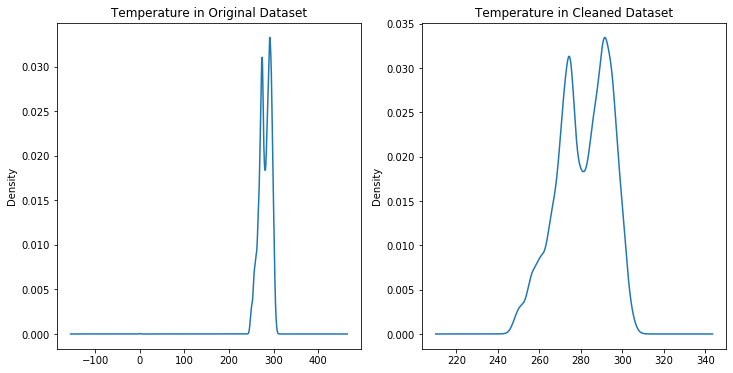

In [6]:
# Your code:
# set up side-by-side plots
fig, axes = plt.subplots(ncols=2,figsize=(12,6))
# plot the density distribution in the original dataset
data['temperature'].plot.kde(ax = axes[0],subplots=True)
# plot the density distribution in the cleaned dataset
cleaned_data['temperature'].plot.kde(ax = axes[1],subplots=True)
# set titles for both plots
axes[0].set_title("Temperature in Original Dataset")
axes[1].set_title("Temperature in Cleaned Dataset")


   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

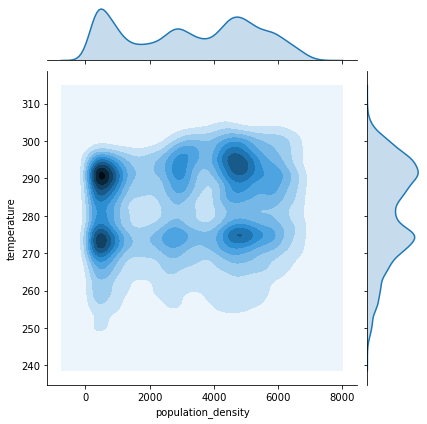

In [14]:
# Your code:
import seaborn as sns
# concat the data columns 'population_density' and 'temperature'
pd_temp = pd.concat([cleaned_data['population_density'], cleaned_data['temperature']], axis = 1)
# plot the two distributions together
sns.jointplot(x="population_density", y="temperature", data=pd_temp, kind="kde");

# - Interpretation: Variable "Temperature" has high density (frequency) around 
#  From following graph, we can identify the highest frequency of data, which ranges from 285 to 295 of 'temperature',
#  from 0 to 1000 of the 'population_density'. Beacuse the highest color intensity represents the highest frequency.


## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [8]:
# Your code:
cleaned_data['temperature_categorical'] = None
cleaned_data.loc[cleaned_data['temperature'] >= Q3, 'temperature_categorical'] = 'high'
cleaned_data.loc[cleaned_data['temperature'] <= Q1, 'temperature_categorical'] = 'low'
cleaned_data.loc[(cleaned_data['temperature'] < Q3) & (cleaned_data['temperature'] > Q1) , 'temperature_categorical'] = 'medium'

cleaned_data.to_csv("./cleaned_data.csv", index=False)


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [16]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree
df = cleaned_data[['holiday','temperature_categorical','weather_type','population_density_categorical']]

columns = df.columns
# define features
descriptive_features = columns[:-1]
label = columns[-1]
for column in columns:
    df[column]= df[column].astype(str)
# get feature values
data_descriptive = df[descriptive_features].values
data_label = df[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)
# make decision tree with 5000 minimum split
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
decisionTree.id3(0,5000)
# visualize the tree 
dot = decisionTree.print_visualTree( render=True )
#decision tree jpg is in the output file
print("System entropy: ", format(decisionTree.entropy))

C:\Users\wangr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


descriptive features:
Index(['holiday', 'temperature_categorical', 'weather_type'], dtype='object')

target feature:
population_density_categorical
System entropy:  2.2318888460740816


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: From the tree, we can identify the second level is "weather_type", which is also the splitting point      of the second round of ID3.

## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [9]:
# Your code:
data_3 = cleaned_data[['holiday','temperature','rain_1h','snow_1h','clouds_percentage','date_time','population_density']]
data_3['date_time'] = pd.to_datetime(data_3['date_time'])
data_3['date_time'] = data_3['date_time'].apply(lambda x: x.hour )
# print(data_3)


C:\Users\wangr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wangr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation:
The variables 'temperature', 'rain_1h', 'snow_1h','clouds_percentage', and 'date_time' are suitable as an inputs for regression, since they have continuous numerical values. ('data_time' has been modified before)
"holiday" need to be modified first. Because the values of "holiday" are categorical values.


   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation: when the value of 'holiday' is None, we set it into 0, otherwise, we set it into 1.Because the most values in 'holiday' values are 'None', and data entries for specific holidays are relatively rare, so it is not necessary to concentrate on specific holiday values. Thus we only distinguish between none-holidays and holidays.


In [11]:
# Your code:
data_3.loc[cleaned_data['holiday'].astype(str) != 'None' , 'holiday'] = 1
data_3.loc[cleaned_data['holiday'].astype(str) == 'None' , 'holiday'] = 0
print(data_3.head(2),'\n')
# descriptive features X
X = data_3[['holiday','temperature','rain_1h','snow_1h','clouds_percentage','date_time']]
# target feature y
y = data_3['population_density']
print('X: \n', X.head(), '\n')
print('y: \n', y.head(), '\n')


   holiday  temperature  rain_1h  snow_1h  clouds_percentage  date_time  \
0        0       258.52      0.0      0.0                 20          7   
1        0       302.58      0.0      0.0                  5         19   

   population_density  
0                6439  
1                3658   

X: 
    holiday  temperature  rain_1h  snow_1h  clouds_percentage  date_time
0        0       258.52      0.0      0.0                 20          7
1        0       302.58      0.0      0.0                  5         19
2        0       275.79      0.0      0.0                 90         13
3        0       269.01      0.0      0.0                 75         10
4        0       260.09      0.0      0.0                  1          2 

y: 
 0    6439
1    3658
2    3908
3    4047
4     407
Name: population_density, dtype: int64 



C:\Users\wangr\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

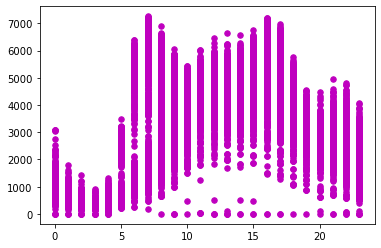

In [19]:
# Your code:
# sns.barplot(x="date_time", y="population_density", data=data_3)
plt.scatter( data_3['date_time'],data_3['population_density'], color = "m", marker = "o", s = 30) 

   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [12]:
# Your code:
RegA = data_3.sample(frac=0.5, axis=0, replace=None) #random sampling
RegB = data_3.head(RegA.shape[0]) #top sampling

RegA.to_csv("./RegA.csv", index=False)
RegB.to_csv("./RegB.csv", index=False)

Explanation:
The first sampling method that we used is random sampling, to keep in the basic structure of the entire data set, since each data point has a equal probability of being in the sampled data set.

The second sampling method that we used is the top sampling, which is a fast and easy way to get the sampled data, especially for large data set.

We expect random sampling to have a better result, since there could be some order in the original dataset, thus using top sampling might introduce some bias in the sampled data.


   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [21]:
# Your code:
from sklearn.linear_model import LinearRegression

#RegA
X_RegA = RegA[['holiday','temperature','rain_1h','snow_1h','clouds_percentage','date_time']]
y_RegA = RegA['population_density']
classifier_RegA = LinearRegression(normalize=True)
classifier_RegA.fit(X_RegA,y_RegA)
# y_Predict_A = classifier_RegA.predict(X_RegA)
#RegB
X_RegB = RegB[['holiday','temperature','rain_1h','snow_1h','clouds_percentage','date_time']]
y_RegB = RegB['population_density']
classifier_RegB = LinearRegression(normalize=True)
classifier_RegB.fit(X_RegB,y_RegB)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

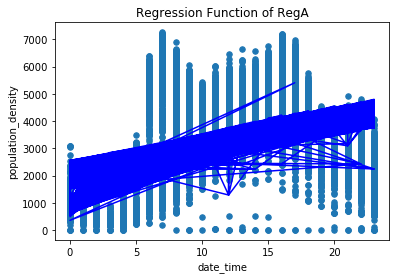

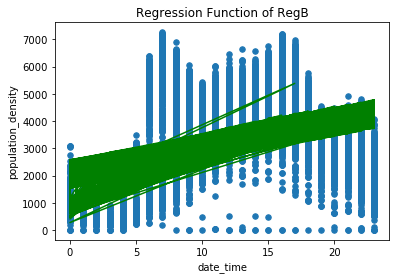

In [23]:
# Your code:
y_predict_A = classifier_RegA.predict(X)
y_predict_B = classifier_RegB.predict(X)
#visualize regression function
#visualize RegA
plt.scatter( X['date_time'], y, marker = "o", s = 30) 
plt.plot(X['date_time'], y_predict_A, color = "b")  
plt.xlabel('date_time') 
plt.ylabel('population_density') 
plt.title('Regression Function of RegA')
plt.show()
#visualize RegB
plt.scatter( X['date_time'], y,  marker = "o", s = 30) 
plt.plot(X['date_time'], y_predict_B, color = "g")  
plt.xlabel('date_time') 
plt.ylabel('population_density') 
plt.title('Regression Function of RegB')
plt.show()

   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

In [29]:
# Your code:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# error for trained model a
mean_squared_error_a = mean_squared_error(y, y_predict_A)
mean_absolute_error_a = mean_absolute_error(y, y_predict_A)
median_absolute_error_a = median_absolute_error(y, y_predict_B)
print('Model A: \n - mean squared error: {} \n - mean absolute error: {} \n - median absolute error: {}'.format(mean_squared_error_a, mean_absolute_error_a, median_absolute_error_a))

# error for trained model b
mean_squared_error_b = mean_squared_error(y, y_predict_B)
mean_absolute_error_b = mean_absolute_error(y, y_predict_B)
median_absolute_error_b = median_absolute_error(y, y_predict_B)
print('Model B: \n - mean squared error: {} \n - mean absolute error: {} \n - median absolute error: {}'.format(mean_squared_error_b, mean_absolute_error_b, median_absolute_error_b))

Model A: 
 - mean squared error: 3408519.0122323553 
 - mean absolute error: 1632.1877922904189 
 - median absolute error: 1634.3941082115657
Model B: 
 - mean squared error: 3408104.192577025 
 - mean absolute error: 1632.9063620013505 
 - median absolute error: 1634.3941082115657


   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:
Based on the analysis above, we observe that the two models have similar values in each error aspect. Compared with Model B, Model A has relatively bigger error values. 
The reason of this observation might be, that the two sample datasets have similar structure, meaning that there are no obvious and direct order between rows in sample data B (using top sampling). 
We would reccommend Model A for future prediction, since random sampling gives a stronger guarantee for prediction quality.
To improve the method, we would first filter the values in the target feature 'population_density', since we have observed several outliers based on the plot in 3(c).

## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [13]:
# Your code:
# select corresponding columns
svm_df = cleaned_data.loc[:, ['holiday', 'temperature', 'rain_1h', 
                             'snow_1h', 'clouds_percentage', 'date_time', 
                             'population_density_categorical']]

# replace the date_time with time values
svm_df['date_time'] = pd.to_datetime(svm_df['date_time'])
svm_df['date_time'] = svm_df['date_time'].apply(lambda x: x.hour )
svm_df.head()


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density_categorical
0,None,258.52,0.0,0.0,20,7,very high
1,None,302.58,0.0,0.0,5,19,medium
2,None,275.79,0.0,0.0,90,13,medium
3,None,269.01,0.0,0.0,75,10,medium
4,None,260.09,0.0,0.0,1,2,very low


   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [14]:
# Your code:

# transform 'holiday' using one-hot coding
svm_df_transformed = pd.get_dummies(svm_df, prefix=['holiday'], columns=['holiday'])

# transform 'date_time' to integers
svm_df_transformed.head()


,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density_categorical,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,258.52,0.0,0.0,20,7,very high,0,0,0,0,0,0,0,1,0,0,0,0
1,302.58,0.0,0.0,5,19,medium,0,0,0,0,0,0,0,1,0,0,0,0
2,275.79,0.0,0.0,90,13,medium,0,0,0,0,0,0,0,1,0,0,0,0
3,269.01,0.0,0.0,75,10,medium,0,0,0,0,0,0,0,1,0,0,0,0
4,260.09,0.0,0.0,1,2,very low,0,0,0,0,0,0,0,1,0,0,0,0


Explanation:
Same as linear regression, SVM typically needs continuous data as input. Thus, the features 'temperature', 'rain_1h',
'snow_1h', 'clouds_percentage' do not need to be modified, since they are already numerical. 
On the other hand, the categorical feature 'holiday' and 'date_time' needs to be transformed before applying to SVM. Here we use one-hot coding for the attribute 'holiday' since it has no clear order. For 'date_time', we transform the time, which has a natural order, into integers.

   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [15]:
# Your code:
from sklearn.model_selection import train_test_split
# split the dataset 
df_svm_train, df_svm_test = train_test_split(svm_df_transformed, test_size=0.3, random_state=0)

# save the training dataset and test dataset as csv file
df_svm_train.to_csv("./svmTrain.csv", index = False)
df_svm_test.to_csv("./svmTest.csv", index = False)

Explanation:
We use the build-in function from sklearn, and include 70% of the data in the training dataset, the others in the test dataset. Since we want to employ enough data points for an accurate result, but avoid overfitting and underfitting at the mean time.


   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [ ]:
# Your code:
from sklearn.svm import SVC

# load data and specify the descriptive features and target feature
df_svm_train = pd.read_csv("./svmTrain.csv")
X_svm = df_svm_train.loc[:, df_svm_train.columns != 'population_density_categorical']
Y_svm = df_svm_train['population_density_categorical']

# define three distinct SVM models and fit the training dataset 
# SVM Model A, which uses linear kernel
classifier_svm_a = SVC(C=1, kernel = 'linear')
classifier_svm_a.fit(X_svm, Y_svm)

# SVM Model B, which uses rbf kernel
classifier_svm_b = SVC(C=0.5, kernel = 'linear')
classifier_svm_b.fit(X_svm, Y_svm)

# SVM Model C, which uses sigmoid kernel
classifier_svm_c = SVC(C=1, kernel = 'sigmoid', gamma='auto')
classifier_svm_c.fit(X_svm, Y_svm)

   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [88]:
# Your code:
from sklearn.metrics import classification_report

df_svm_test = pd.read_csv('./svmTest.csv')

# specify the features for the test data
X_svm_test = df_svm_test.loc[:, df_svm_test.columns != 'population_density_categorical']
Y_svm_test = df_svm_test['population_density_categorical']

# generate 3 predictions using the 3 svm models
pred_svm_a = classifier_svm_a.predict(X_svm_test)
pred_svm_b = classifier_svm_b.predict(X_svm_test)
pred_svm_c = classifier_svm_c.predict(X_svm_test)

print('- Accuracy(model A): ', classifier_svm_a.score(X_svm_test, Y_svm_test), '\n')
print('- Accuracy(model B): ', classifier_svm_b.score(X_svm_test, Y_svm_test), '\n')
print('- Accuracy(model C): ', classifier_svm_c.score(X_svm_test, Y_svm_test), '\n')

print('Classification Report(model A): \n', classification_report(Y_svm_test, pred_svm_a), '\n')  
print('Classification Report(model B): \n', classification_report(Y_svm_test, pred_svm_b), '\n')  
print('Classification Report(model C): \n', classification_report(Y_svm_test, pred_svm_c), '\n')



- Accuracy(model A):  0.5659724890494121 

- Accuracy(model B):  0.5705064166602628 

- Accuracy(model C):  0.28018135710443404 



D:\python_conda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report(model A): 
               precision    recall  f1-score   support

        high       0.60      0.73      0.66      3646
         low       0.43      0.33      0.37      2077
      medium       0.37      0.38      0.37      2421
   very high       0.00      0.00      0.00      1298
    very low       0.69      0.87      0.77      3571

    accuracy                           0.57     13013
   macro avg       0.42      0.46      0.43     13013
weighted avg       0.49      0.57      0.52     13013
 

Classification Report(model B): 
               precision    recall  f1-score   support

        high       0.60      0.75      0.66      3646
         low       0.46      0.30      0.36      2077
      medium       0.37      0.41      0.38      2421
   very high       0.00      0.00      0.00      1298
    very low       0.70      0.87      0.78      3571

    accuracy                           0.57     13013
   macro avg       0.42      0.46      0.44     13013
weighte

   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:
For models, we use Linear and Sigmoid kernels and changed penalty parameter C of the error term (how much to  avoid misclassifying examples) to see if there is a difference between the accuracy. As C gets smaller, that means we will have a larger margin which indicates that it is more possible to get misclassified samples. While when C gets larger, SVM will choose a smaller margin separate line if that line can classifier the training points better. 

To compare with the result from above, we can see that the B model has smaller C values, and its accuracy is higher. Thus, even we may possibly have misclassified samples, but larger margin gives us a better prediction. 

Linear kernel models are similar even we changed the C parameter. But for Sigmoid kernel, from the classification report, we can see precisions of target features are almost all 0.0. That is possible because sigmoid is more suitable for the nonlinear data set.

We would recommend SVM with a linear kernel and a 0.5 penalty parameter. Since the performance of Sigmoid kernel on this data set is worse than the linear kernel, it is reasonable to conclude that, for this data set, it more likely linear separable since Sigmoid kernel is used for non-linear kernels and used on the data if the class boundaries are non-linear or overlapping. 


## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [ ]:
# Your code:
nn_df = pd.read_csv("./population_density_categorical.csv").head(4000)
print('possible extracted features:', nn_df.columns.values[:len(nn_df.columns)-1],'\n')
print('- number of possible values in "holiday":', nn_df['holiday'].unique().shape[0], '\n')
print('- number of possible values in "weather_type":', nn_df['weather_type'].unique().shape[0], '\n')
print('- number of possible values in "weather_type_details":', nn_df['weather_type_details'].unique().shape[0], '\n')
# print('- number of possible values in "population_density_categorical":', nn_df['population_density_categorical'].unique().shape[0], '\n')
print("the the number of possible patterns of inputs for the categorical data:", nn_df['holiday'].unique().shape[0]* nn_df['weather_type'].unique().shape[0]*nn_df['weather_type_details'].unique().shape[0])
nn_df.head()

Explanation:
We extract all features except "population_density_categorical"(target feature) , because they are all numrical features or categorical features, and categorical feature can also be transfered into numerical values by one-hot-enconding.
In each categorical featues, we need one input neuron for each possible value. So we have 3 input neurons for the feature 'holiday', 11 neurons for 'weather_type', and 30 neurons for 'weather_type_details'. Thus, we have 3*11*30 = 990 input possiblies for the categorical features. 

   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:
The results will be relatively accurate, since the target feature 'population_density_categorical' is defined by population density, as long as we give the NN feed enough training examples, while getting more iterations, the boundaries for population density will be sufficiently close. 

We have enough number of data points for each class of population density categorical feature to support the training for Neural Networks, thus from the given data, we expeceted a relateively high accuracy of the neural network.


In [142]:
# Your code:
print('number of columns of very high: %d \n'%len(nn_df.loc[nn_df['population_density_categorical'] == 'very high', nn_df.columns]))
print('number of columns of high: %d \n'%len(nn_df.loc[nn_df['population_density_categorical'] == 'high', nn_df.columns]))
print('number of columns of medium: %d \n'%len(nn_df.loc[nn_df['population_density_categorical'] == 'medium', nn_df.columns]))
print('number of columns of low: %d \n'%len(nn_df.loc[nn_df['population_density_categorical'] == 'low', nn_df.columns]))
print('number of columns of very low: %d \n'%len(nn_df.loc[nn_df['population_density_categorical'] == 'very low', nn_df.columns]))


number of columns of very high: 407 

number of columns of high: 1081 

number of columns of medium: 796 

number of columns of low: 634 

number of columns of very low: 1082 



   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:
Explanation:
- The feature 'date_time' is nominal, and cannot be directly processed as input for neural networkds, thus we apply the same transformation as we did for SVM and linear regression, which is keeping the time and turn them into integers.
- Since we have categorical features 'holiday', 'weather_type', 'weather_type_details', we need to convert them using one-hot encoding.

In [151]:
# Your code:
nn_df = pd.read_csv("./population_density_categorical.csv").head(4000)
# set 'date_time' into integer of hour
nn_df['date_time'] = pd.to_datetime(nn_df['date_time'])
nn_df['date_time'] = nn_df['date_time'].apply(lambda x: x.hour )
# concert using one-hot encoding
nn_df_transformed = pd.get_dummies(nn_df, prefix=['holiday','weather_type','weather_type_details'], columns=['holiday','weather_type','weather_type_details'])

   (d) Train your network with default hyperparameters and return the parameters.

In [212]:
# Your code:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# split the training data and test data set
df_nn_train, df_nn_test = train_test_split(nn_df_transformed, test_size=0.5, random_state=1)
X_nn_training = df_nn_train.loc[:, df_nn_train.columns != 'population_density_categorical']
Y_nn_training = df_nn_train['population_density_categorical']

classifier_nn_default = MLPClassifier()
classifier_nn_default.fit(X_nn_training, Y_nn_training)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [213]:
# Your code: (number of hidden layers)
# 0 hidden layers
classifier_nn_layers_0 = MLPClassifier(hidden_layer_sizes=())
classifier_nn_layers_0.fit(X_nn_training, Y_nn_training)
# 2 two layers
classifier_nn_layers_2 = MLPClassifier(hidden_layer_sizes=(100,100))
classifier_nn_layers_2.fit(X_nn_training, Y_nn_training)


D:\python_conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [214]:
# Your code: (number of nodes in the hidden layer)
# nodes of hidden layer :50
classifier_nn_nodes_50 = MLPClassifier(hidden_layer_sizes=(50,))
classifier_nn_nodes_50.fit(X_nn_training, Y_nn_training)
# nodes of hidden layer: 150
classifier_nn_nodes_150 = MLPClassifier(hidden_layer_sizes=(150,))
classifier_nn_nodes_150.fit(X_nn_training, Y_nn_training)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [244]:
# Your code: (optimized network) 
X_nn_test = df_nn_test.loc[:, df_nn_train.columns != 'population_density_categorical']
Y_nn_test = df_nn_test['population_density_categorical']

# print(classification_report(Y_nn_test,classifier_nn_layers_0(Y_nn_test) ))
print('Accuracy of 0 hidden layer: ', classifier_nn_layers_0.score(X_nn_test, Y_nn_test))
print('Accuracy of 2 hidden layers: ', classifier_nn_layers_2.score(X_nn_test, Y_nn_test))
print('Accuracy of 1 hidden layer: ', classifier_nn_default.score(X_nn_test, Y_nn_test))
print('Accuracy of 1 hidden layer 100 nodes: ',classifier_nn_default.score(X_nn_test, Y_nn_test))
print('Accuracy of 1 hidden layer 50 nodes: ',classifier_nn_nodes_50.score(X_nn_test, Y_nn_test))
print('Accuracy of 1 hidden layer 150 nodes: ',classifier_nn_nodes_150.score(X_nn_test, Y_nn_test))


Accuracy of 0 hidden layer:  0.885
Accuracy of 2 hidden layers:  0.727
Accuracy of 1 hidden layer:  0.9055
Accuracy of 1 hidden layer 100 nodes:  0.9055
Accuracy of 1 hidden layer 50 nodes:  0.885
Accuracy of 1 hidden layer 150 nodes:  0.822


Explanation:
From the data we can see that one layer with 100 nodes has the best accuracy. That's might because too much parameters of NN will cause overfitting and too less parameters of NN will cause underfitting.


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [287]:
# Your code: (linear activation function):

# classifier with an identity activation function
classifier_nn_identity = MLPClassifier(activation='identity')
classifier_nn_identity.fit(X_nn_training, Y_nn_training)
pred_nn_identity = classifier_nn_identity.predict(X_nn_test)

# confusion matrix 
print(classification_report(Y_nn_test, pred_nn_identity))
print('Accuracy: ', classifier_nn_identity.score(X_nn_test, Y_nn_test))

              precision    recall  f1-score   support

        high       0.67      0.99      0.80       563
         low       0.93      0.84      0.88       317
      medium       0.86      0.81      0.83       384
   very high       1.00      0.00      0.01       206
    very low       0.99      0.97      0.98       530

    accuracy                           0.82      2000
   macro avg       0.89      0.72      0.70      2000
weighted avg       0.86      0.82      0.78      2000

Accuracy:  0.824


In [337]:
# Your code: (non-linear activation function):

# classifier with a logistic activation function
classifier_nn_logistic = MLPClassifier(activation='logistic')
classifier_nn_logistic.fit(X_nn_training, Y_nn_training)
pred_nn_logistic = classifier_nn_logistic.predict(X_nn_test)
print(classification_report(Y_nn_test, pred_nn_logistic))
print('Accuracy: ', classifier_nn_logistic.score(X_nn_test, Y_nn_test))

              precision    recall  f1-score   support

        high       0.90      0.91      0.91       563
         low       0.91      0.93      0.92       317
      medium       0.95      0.82      0.88       384
   very high       0.80      0.95      0.87       206
    very low       0.99      1.00      0.99       530

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000

Accuracy:  0.922


Explanation:
We obtain the results from applying identity function and logistic function on our datasets. Clearly we have better accuracy on the logistic model than on identity model. 


Based on the classification report, we can see that the identity model doesn't work well with the "very high" category while logistic models have a better result. The precision of the identity model with the "very high" category is 1.0 but the recall is 0.0, which means there has a same number of positive samples as total positive sample returned. But recall rate indicates that none of the samples should be classified as positive. 

Since identity function does not manipulate the data, so neural network works just like a linear regression model, so no matter how many layers it has, it will work just like a single layer neural network, which, ends up being another linear function. While logistic function is a non-linear function that can help the neural network to learn complex data, it creates relationships between data inputs and outputs as well as limited data input range from 0 to 1. The logistic function can develop to the deep neural network which helps learn complex and high-dimensional data. 


## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the training data
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

folds = KFold(n_splits=3)
# confusion matrix SVM classifier 4(c)
X_svm_complete = svm_df_transformed.loc[:, svm_df_transformed.columns != 'population_density_categorical']
Y_svm_complete = svm_df_transformed['population_density_categorical']
print('- SVM classifier from 4(c) \n')
for train_index, test_index in folds.split(X_svm_complete):
    X_train, X_test = X_svm_complete.iloc[train_index], X_svm_complete.iloc[test_index]
    y_train, y_test = Y_svm_complete[train_index], Y_svm_complete[test_index]
#     classifier_svm_a.fit(X_train,y_train)
    print('Confusion Matrix: \n', pd.crosstab(np.array(y_train), np.array(classifier_svm_a.predict(X_train)), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# confusion matrix for classifier_nn_logistic from 5(e)
X_nn = nn_df_transformed.loc[:, nn_df_transformed.columns != 'population_density_categorical']
Y_nn = nn_df_transformed['population_density_categorical']
print('- Neural Network classifier from 5(f) \n')
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_default.fit(X_train,y_train)
    print('Confusion Matrix: \n', pd.crosstab(np.array(y_train), np.array(classifier_nn_default.predict(X_train)), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# confusion matrix for classifier_nn_logistic from 5(f)
X_nn = nn_df_transformed.loc[:, nn_df_transformed.columns != 'population_density_categorical']
Y_nn = nn_df_transformed['population_density_categorical']
print('- Neural Network classifier from 5(f) \n')
# print 3-folds metrics
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_logistic.fit(X_train,y_train)
    print('Confusion Matrix: \n', pd.crosstab(np.array(y_train), np.array(classifier_nn_logistic.predict(X_train)), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the test data

# confusion matrix SVM classifier 4(c)
print('- SVM classifier from 4(c) \n')
for train_index, test_index in folds.split(X_svm_complete):
    X_train, X_test = X_svm_complete.iloc[train_index], X_svm_complete.iloc[test_index]
    y_train, y_test = Y_svm_complete[train_index], Y_svm_complete[test_index]
#     classifier_svm_a.fit(X_test,y_test)
    print('Confusion Matrix: \n', pd.crosstab(np.array(y_test), np.array(classifier_svm_a.predict(X_test)), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# confusion matrix for classifier_nn_logistic from 5(e)
print('- Neural Network classifier from 5(f) \n')
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_default.fit(X_test,y_test)
    print('Confusion Matrix: \n', pd.crosstab(np.array(y_test), np.array(classifier_nn_default.predict(X_test)), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# confusion matrix for classifier_nn_logistic from 5(f)
print('- Neural Network classifier from 5(f) \n')
# print 3-folds metrics
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_logistic.fit(X_test,y_test)
    print('Confusion Matrix: \n', pd.crosstab(np.array(y_test), np.array(classifier_nn_logistic.predict(X_test)), rownames=['True'], colnames=['Predicted'], margins=True),'\n')


- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [ ]:
# Your code for precision, recall and F1-scores on the test data

# confusion matrix SVM classifier 4(c)
print('- SVM classifier from 4(c) \n')
for train_index, test_index in folds.split(X_svm_complete):
    X_train, X_test = X_svm_complete.iloc[train_index], X_svm_complete.iloc[test_index]
    y_train, y_test = Y_svm_complete[train_index], Y_svm_complete[test_index]
#     classifier_svm_a.fit(X_train,y_train)
    print('Accuracy: ', classifier_svm_a.score(X_train, y_train))
    print('Accuracy: ', classifier_svm_a.score(X_test, y_test))
    print(classification_report(y_test, classifier_svm_a.predict(X_test)))
# confusion matrix for classifier_nn_logistic from 5(e)
print('- Neural Network classifier from 5(f) \n')
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_default.fit(X_train,y_train)
    print(classification_report(y_test, classifier_nn_default.predict(X_test)))

# confusion matrix for classifier_nn_logistic from 5(f)
print('- Neural Network classifier from 5(f) \n')
# print 3-folds metrics
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_logistic(X_train,y_train)
    print(classification_report(y_test, classifier_nn_logistic.predict(X_test)))


- Accuracy scores on training and test data (give explicitly the result for each fold)

In [ ]:
# Your code for accuracy scores on training and test data
print('- SVM classifier from 4(c) \n')
for train_index, test_index in folds.split(X_svm_complete):
    X_train, X_test = X_svm_complete.iloc[train_index], X_svm_complete.iloc[test_index]
    y_train, y_test = Y_svm_complete[train_index], Y_svm_complete[test_index]
#     classifier_svm_a.fit(X_train,y_train)
    print('Accuracy of training data: ', classifier_svm_a.score(X_train, y_train))
    print('Accuracy of test data: ', classifier_svm_a.score(X_test, y_test))

print('- Neural Network classifier from 5(f) \n')
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_default.fit(X_train,y_train)
    print('Accuracy of training data: ', classifier_nn_default.score(X_train, y_train))
    print('Accuracy of test data: ', classifier_nn_default.score(X_test, y_test))
    
print('- Neural Network classifier from 5(f) \n')
# print 3-folds metrics
for train_index, test_index in folds.split(X_nn):
    X_train, X_test = X_nn.iloc[train_index], X_nn.iloc[test_index]
    y_train, y_test = Y_nn[train_index], Y_nn[test_index]
#     classifier_nn_logistic(X_train,y_train)
    print('Accuracy of training data: ', classifier_nn_logistic.score(X_train, y_train))
    print('Accuracy of test data: ', classifier_nn_logistic.score(X_test, y_test))


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:
Since SVM and regression are comparable in practical, whether our data is linear separable or not will more helpful in determining what kernel should be used for SVM. SVM is more suitable for high-dimensional and fewer data. While regression is a better choice for reducing the features. But for the neural networks, it is suitable for all types of data and very flexible. It also can be used for a lot of data.

As we go through the regression, SVM and neural network models on our dataset. We think the neural network is the best model for predicting this data set. We have over 40,000 samples which is a comparably large dataset. Since we used one-hot encoding, the number of features are also increased. 

By comparing with accuracy, we find out that generally, SVM models have a lower accuracy rate while neural network models have a higher rate.


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:
We think SVM suffer from underfitting and overfitting depends on parameter values. 

With different kernel functions:
SVM with poly kernel faces an overfitting situation. Since the higher the degree, the more flexible the function. It will try to catch every data point. While with the linear kernel, SVM may face an underfitting since it cannot touch every data point.  

With C parameter: 
when C is large, SVM mainly fits the samples in the training set, it will choose a smaller hyperplane that reduces the misclassified samples, so that training errors can be minimized. However, since it considers too much about every training points. It is difficult to apply the model on testing samples, which will result in overfitting.

As C gets smaller, that means SVM tries to enlarge the margin and will allow some misclassified data samples. When we apply this model to test samples, both the training set and the testing set will have a lot of misclassified samples. So this is underfitting.

In a nutshell, when C is large, the SVM tends to be overfitting, and when C is small, the SVM tends to be underfitting.

   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:
We used the K-fold cross-validation method above. So for K-fold cross-validation, we separate the dataset into k parts, and always leave one set as a test set, the rest of them are training set. So in this case, we train k times of the data, which ensured that we used all of our data so that we won't affect by bad choices of the training set and test set. Also, we create multiple models and matrices which help us to check whether each model performance is consistent, and helps in selecting the best-fit Model.

However, since our calculation time depends on k, the total calculation time can be very long. And it is not suitable for fewer data. 
